<a href="https://colab.research.google.com/github/ch00226855/CMP414765Spring2021/blob/main/Week07_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 7
# Logistic Regression

We have studied how to use linear regression and polynomial regression to *predict a target numeric value*. There is another learning task, **classification**, aiming at predicting group membership rather than numeric values. Email spam filter is a good example: it is trained with many example emails with their class (spam or non-spam), and it must learn how to classify new emails.

Linear regression is **not** a good choice for classification tasks. We will introduce the **logistic regression** model and use the iris dataset to illustrate how the model works.

**Readings4**: Textbook Chapter 4

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## Logistic Regression: Intuition
- Picture the data as points on the plane.
- A classifier's job is to determine the decision regions for each class.
- If a point is far from the decision boundary, then the classifier should be fairly confident about its prediction.
- If a point is near the decision boundary, then the classifier may be less confident about its prediction.
- The **logistic regression** model aims to provide a **probablity distribution** for each point. The probability distribution has little variance if the point is far from decision boundary.
- **Probability distribution with high variance**: rolling a die - there is no way to predict the exact outcome
- **Probability distribution with low variance**: getting the flu today - probably not going to happen

<img src="https://mlr-org.com/docs/2015-07-28-Visualisation-of-predictions_files/figure-html/qda-1.png" width="600">

In [ ]:
# Examples of low-variance probability distributions:
[0.99, 0.001, 0.009] # low variance: the outcome most likely will be 1.
[0.1, 0.8, 0.1] # low variance: the outcome most likely will be 2.

# Examples of high-variance probability distributions:
[0.333, 0.333, 0.334] # high variance
[0.5, 0.5] # high variance

## Basic Case: Binary Classifier
- Suppose there are only two classes for the output feature: **Class 0** (the negative class) and **Class 1** (the positive class).
- A **binary classifer** tries to estimate the probability $p$ that a point belongs to Class 1.
- The probability that a point belongs to Class 0 is $1 - p$.
- Given the probability, the binary classifier will compare it with a chosen **threshold** (for example, 0.5), and then predict the class as
    - prediction = 1 if $\hat{p}$ $\ge$ threshold
    - prediction = 0 if $\hat{p}$ < threshold
- The **boundary** of decision regions is given by the curve formed by points whose probability equals to the threshold value.

## Example: The Iris Dataset

**Iris dataset** is a famous dataset that contains the sepal and petal length and width of 150 iris flowers of three different species: Iris-Setosa, Iris-Versicolor, and Iris-Virginica. [wiki page](https://en.wikipedia.org/wiki/Iris_flower_data_set)

- Import dataset using <code>sklearn.dataset.load_iris()</code>
- Explore the dataset: data description, feature names, data types, data histograms, scatter plots.
- Split the dataset into train_set and test_set
- Apply <code>sklearn.linear_model.LogisticRegression</code> to build a binary classifier on **Iris-Virginica**.
- Evaluate the performance of the model: Accuracy, cross-validation, precision vs. recall, confusion matrix...
- Visualize the model (show decision boundary)

<img src="https://miro.medium.com/max/1000/1*Hh53mOF4Xy4eORjLilKOwA.png" width="600">


In [2]:
# Load the dataset
from sklearn import datasets
iris = datasets.load_iris()

iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
# Description of the dataset
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
print(iris['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
# Convert the data into a data frame
iris_df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
# Add the target class
iris_df['target'] = iris['target']
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
# Explore the dataset
# How many examples are there for each type of Iris?

iris_df['target'].value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

In [8]:
# Find the min, max, mean, and median of each variable

iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [9]:
# Flower names are contained in the original iris object
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
# Create a function that maps 0-2 to the actual type of iris
def get_target_name(x):
    return iris['target_names'][x]

x = iris_df.loc[124, 'target']
name = get_target_name(x)
print(x, name)

2 virginica


In [11]:
# Apply get_target_name() to all target values
iris_df['target_name'] = iris_df['target'].apply(get_target_name)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


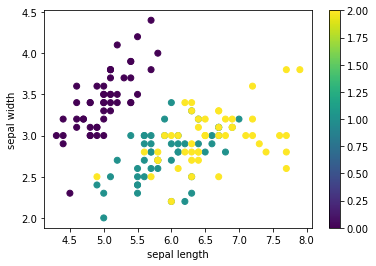

In [ ]:
# Draw scatter plots.
plt.scatter(iris_df.loc[:, 'sepal length (cm)'], iris_df.loc[:, 'sepal width (cm)'], c=iris_df['target'])
plt.colorbar()
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.show()

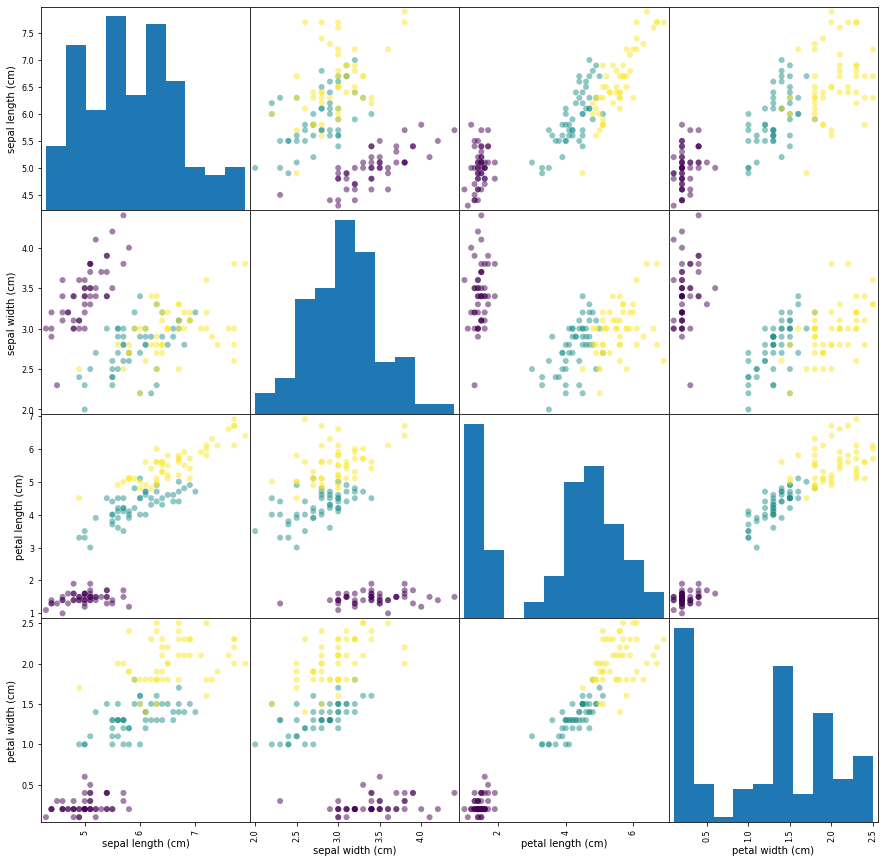

In [ ]:
# Draw all scatter plots
from pandas.plotting import scatter_matrix
scatter_matrix(iris_df.iloc[:, :4], figsize=(15, 15), marker='o',
               c=iris_df['target'])
plt.show()

## Build A Binary Classifier for Iris-Virginica

In [12]:
# Define a function is_virginica(target) that returns 1 if target is Virginica
# and 0 otherwise
def is_virginica(target):

    # if target == 2:
    #     return 1
    # else: 
    #     return 0
    return int(target == 2)

In [13]:
# Apply function is_virginica() to the data frame, creating a new 
# column "Is_Virginica"

iris_df["Is_Virginica"] = iris_df['target'].apply(is_virginica)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name,Is_Virginica
0,5.1,3.5,1.4,0.2,0,setosa,0
1,4.9,3.0,1.4,0.2,0,setosa,0
2,4.7,3.2,1.3,0.2,0,setosa,0
3,4.6,3.1,1.5,0.2,0,setosa,0
4,5.0,3.6,1.4,0.2,0,setosa,0


In [14]:
# Train-test split
# Split the data frame into 85% training data and 15% test data
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(iris_df, test_size=0.15)

In [ ]:
# Display the amount of Virginica and non-Virginica cases in the training set and the test set
df_test['Is_Virginica'].value_counts()
df_train['Is_Virginica'].value_counts()

0    16
1     7
Name: Is_Virginica, dtype: int64

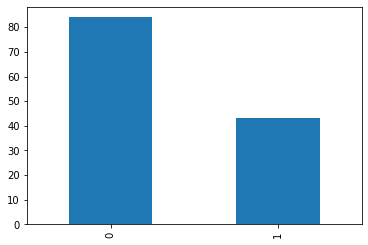

In [ ]:
# Use a bar chart to show the number of cases
df_train['Is_Virginica'].value_counts().plot.bar()

In [15]:
# Build the logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(df_train.loc[:, ['sepal length (cm)',
                           'sepal width (cm)',
                           'petal length (cm)',
                           'petal width (cm)']], df_train['Is_Virginica'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Since using .loc[] expression requires the full names of the columns, sometimes it
# is easier to use their underlying integer indices in .iloc[] expression

# For example, the expression 
# df_train.loc[:, ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
# is equivalent to
# df_train.iloc[:, :4]

## Model Evaluation
- Classification accuracy
- Cross Validation
- Examine four categories using the confusion matrix:
    - True Positive
    - True Negative
    - False Positive
    - False Negative
- Precision, recall, and F1 score

In [ ]:
# 1. Find the prediction accuracy on test set
from sklearn.metrics import accuracy_score

input_cols = ['sepal length (cm)',
            'sepal width (cm)',
            'petal length (cm)',
            'petal width (cm)']

# df_test.head()
# get model's prediction on the test records
test_predictions = model.predict(df_test.loc[:, input_cols])

# model.predict(df_test.iloc[:, :4])

accuracy_score(df_test['Is_Virginica'], test_predictions)

0.9565217391304348

In [ ]:
# Let's calculate the accuracy score without sklearn
# Convert both Is_Virginica and predictions into numpy arrays
array1 = np.array(df_test['Is_Virginica'])
array2 = np.array(test_predictions)
print(array1)
print(array2)

# Count the number of pairs that have identical values
count = 0
for i in range(len(array1)):
    actual = array1[i]
    pred = array2[i]
    if actual == pred:
        count = count + 1
print(count)
accuracy = count / len(array1)
print(accuracy)

[0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0]
[0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0]
22
0.9565217391304348


The accuracy score can be mislead. Consider the following scenario:
- Suppose that the model returns 0 for any input.
- Suppose that 99% of the test set are non-Virginica.
- The accuracy score for this model on this particular test set will be: 0.99

In order to make sure the model is indeed a good one, we need to examine its performance further.

In [ ]:
# 2. confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(df_test['Is_Virginica'], test_predictions)



array([[15,  1],
       [ 0,  7]])

<img src="https://hackernoon.com/hn-images/1*YV7zy1NGN1-HGQxY56nc_Q.png" width="600">

### 3. cross validation
**Cross validation** is an efficient method that uses limited data to obtain multiple evaluations of the model.

<img src="https://www.googleapis.com/download/storage/v1/b/kaggle-forum-message-attachments/o/inbox%2F4788946%2F82b5a41b6693a313b246f02d79e972d5%2FK%20FOLD.png?generation=1608195745131795&alt=media" width="600">

In [20]:
# Perform 3-fold cross validation
from sklearn.model_selection import cross_val_score
input_cols = iris_df.columns[:4]
print(cross_val_score(model, df_train[input_cols], df_train['Is_Virginica'],
                      cv=3))

[0.95348837 0.9047619  1.        ]


### 4. Precision, Recall, and F-1 Score
**Precision** and **recall** are two important metrics that evaluates different aspects of the model. **F-1 score** is a combination of the precision and recall.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/525px-Precisionrecall.svg.png" width="400">

In [ ]:
# precision - recall - f1 score
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(df_test['Is_Virginica'], test_predictions) # How much Virigincia iris are correctly identified?
recall = recall_score(df_test['Is_Virginica'], test_predictions) # How much Virginica predictions are correct?
f1 = f1_score(df_test['Is_Virginica'], test_predictions)
print(precision, recall, f1)

0.875 1.0 0.9333333333333333


In [ ]:
# Calculate the scores ourselves.

# First, we need the number of true positives, false positives, and false negatives.

num_true_positives = 0
for i in range(len(array1)):
    label = array1[i]
    pred = array2[i]
    if label == 1 and pred == 1 :
        num_true_positives = num_true_positives + 1
print(num_true_positives)

num_false_positives = 0
for i in range(len(array1)):
    label = array1[i]
    pred = array2[i]
    if label == 0 and pred == 1:
        num_false_positives = num_false_positives + 1
print(num_false_positives)

precision = num_true_positives / (num_true_positives + num_false_positives)
print(precision)

7
1
0.875


In [ ]:
# Exercise: Calculate the recall score on your own.

# Use a for loop to find the number of true positives
num_true_positives = ???

# Use a for loop to find the number of false negatives
num_false_negatives = ???

# Calculate recall: num_true_positives / (num_true_positives + num_false_negatives)
recall = num_true_positives / (num_true_positives + num_false_negatives)


Consider the following scenario:
- Suppose that the model returns 0 for any input.
- Suppose that there are 99 non_Virginica and 1 Virginica in the test set.
- num_true_positive: 0
- num_false_positive: 0
- num_false_negative: 1
- precision: 0 / (0 + 0) --> undefined
- recall: 0 / (0 + 1) --> 0

### F-1 Score: A Combination of Precision and Recall

Since we expect the model to achieve high precision score and high recall score, we want to combine them into one score.

- $F-1 score = \frac{2}{\frac{1}{precision} + \frac{1}{recall}}$

In [17]:
f1 = 2 / (1 / 0.875 + 1 / 1.0)
print(f1)

0.9333333333333333


In [18]:
# high precision: 0.9
# low recall: 0.1
f1 = 2 / (1 / 0.9 + 1 / 0.1)
print(f1)

0.18


In [19]:
# low precision: 0.1
# high recall: 0.9
f1 = 2 / (1 / 0.1 + 1 / 0.9)
print(f1)

0.18


## Logistic Regression: Model Assumption
**Binary classifier model**: Logistic regression model assumes that the decision boundary is represented as a linear function:

$\log\frac{\hat{p}}{1 - \hat{p}} = \theta_0 + \theta_1x_1 + \theta_2x_2 +\cdots + \theta_nx_n,$
- n: number of input features.
- $x_1, ..., x_n$: input features
- $\hat{p}$: the estimated probability of data belonging to the class
- $\theta_0,...,\theta_n$: parameters of the model

**Alternative format**:

$\hat{p} = \sigma(\textbf{x}\cdot\theta^T).$

- $\textbf{x} = (1, x_1, ..., x_n)$.
- $\theta = (\theta_0, \theta_1, ..., \theta_n)$.
- $\sigma(t) = \frac{1}{1+e^{-t}}$: logistic function

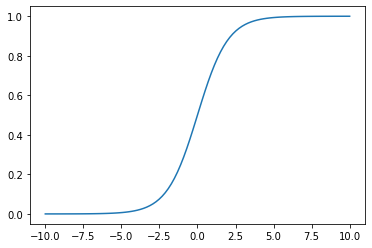

In [21]:
# Plot the graph of logistic function

# 1. Pick a list of x coordinates (`np.linspace`)
x = np.linspace(-10, 10, 100)
# 2. For each x, find the value of the function
values = 1 / (1 + np.exp(-x)) # Since x is a numpy array, we can apply
                                # np.exp directly
# 3. plot the list of x coordinates and y coordinates using
plt.plot(x, values, )


## Logistic Regression: Decision Rule

**Decision rule**: Pick a threshold (for example, 0.5), and then

- prediction = 1 if $\hat{p}$ $\ge$ threshold
- prediction = 0 if $\hat{p}$ < threshold

**Trade-off with threshold**:
- If threshold is chosen closer to 1, then the positive predictions are __more likely__ to be correct (fewer **false positives**). However, the negative predictions are __less likely__ to be correct.
- If threshold is chosen closer to 0, then the negative predictions are __more likely__ to be correct (fewer **false negatives**). However, the positive predictions are __less likely__ to be correct.

## Logistic Regression: Cost Function and Training Algorithm
For classification tasks, it is no longer appropriate to use MSE as the cost function.

**Cost (loss) function** for logistic regression:

\begin{equation}
c(\theta) = \left\{
\begin{array}{cc}
-\log(\hat{p}) & \textit{if  }y=1,\\
-\log(1-\hat{p}) & \textit{if  }y=0.
\end{array}
\right.
\end{equation}

The cost function $c(\theta)$:

- small if $y=1$ (data example belongs to the class) and $\hat{p}$ is close to 1.
- small if $y=0$ (data example does not belong to the class) and $\hat{p}$ is close to 0.
- is a convex function no matter what $y$ is.

**Uniformed expression for the cost function**:

$J(\theta)=-\frac{1}{m}\sum_{i=1}^{m}\big[y^{(i)}\log(\hat{p}^{(i)}) + (1-y^{(i)})\log(1-\hat{p}^{(i)})\big]$

- $c(\theta) = J(\theta)$ for $y=0$ and $y=1$.
- There is no equivalent of the Normal Equation.
- $J(\theta)$ is a convex function, so the *gradient descent algorithm* will guarantee to find its global minimum.
- $\frac{\partial J}{\partial \theta_j}=\frac{1}{m}\sum_{i=1}^{m}\big(\sigma(\textbf{x}^{(i)}\cdot\theta^T) - y^{(i)}\big)x_j^{(i)}$.

## Logistic Regression: Model Visualization
- Create a grid of points from a list of x coordinates and y coordinates.
- Use the model to obtain prediction probability on each point from the grid
- Find points with marginal probabilities.
- Plot the grid.

In [22]:
# Train a new logistic regression model on petal length and petal width only
model2 = LogisticRegression(solver='lbfgs')
model2.fit(df_train.iloc[:, 2:4], df_train['Is_Virginica'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
# 1. Create a grid of points
x0, x1 = np.meshgrid(np.linspace(0, 7, 100),
                     np.linspace(0, 2.7, 100))
print(x0.shape, x1.shape)

(100, 100) (100, 100)


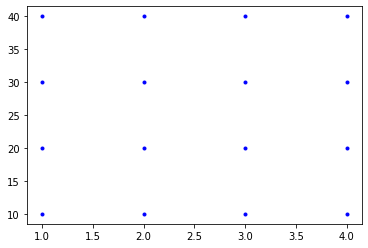

In [24]:
# Illustration of a meshgrid
x_coordinates = [1, 2, 3, 4]
y_coordinates = [10, 20, 30, 40]
xx, yy = np.meshgrid(x_coordinates, y_coordinates)
# print(xx)
# print(yy)
plt.plot(xx, yy, 'b.')

In [25]:
# 2. Obtain prediction probabilities
X_new = np.hstack([x0.reshape([-1, 1]), x1.reshape([-1, 1])])
y_new_prob = model2.predict_proba(X_new)

In [26]:
# 3. Find boundary points.
# Which points give 0.5 probability?
indices = np.where((y_new_prob[:, 1] > 0.49) & (y_new_prob[:, 1] < 0.51))
X_boundary = X_new[indices]

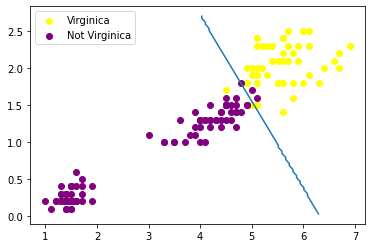

In [27]:
# 4. Plot the boundary
plt.plot(X_boundary[:, 0], X_boundary[:, 1])
index_virginica = (iris_df['Is_Virginica'] == 1)
index_not_virginica = (iris_df['Is_Virginica'] == 0)
plt.scatter(iris_df.loc[index_virginica, 'petal length (cm)'],
            iris_df.loc[index_virginica, 'petal width (cm)'],
            c='yellow',
            label='Virginica')
plt.scatter(iris_df.loc[index_not_virginica, 'petal length (cm)'],
            iris_df.loc[index_not_virginica, 'petal width (cm)'],
            c='purple',
            label='Not Virginica')
plt.legend()

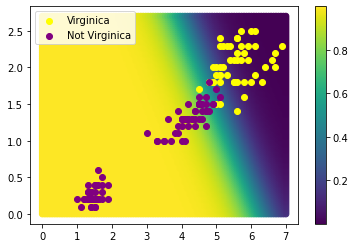

In [28]:
# 5. Plot probabilities
plt.scatter(X_new[:, 0], X_new[:, 1], c=y_new_prob[:, 0])
plt.colorbar()
plt.scatter(iris_df.loc[index_virginica, 'petal length (cm)'],
            iris_df.loc[index_virginica, 'petal width (cm)'],
            c='yellow',
            label='Virginica')
plt.scatter(iris_df.loc[index_not_virginica, 'petal length (cm)'],
            iris_df.loc[index_not_virginica, 'petal width (cm)'],
            c='purple',
            label='Not Virginica')
plt.legend()